In [4]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Make simulated feature matrix
features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)


csv_data = pd.read_csv(
    'imunisasi.csv', usecols=[1,2,3,4,5,6,7],
    names=[
        "BCG", 
        "HB<7 HARI", 
        "DPT-HB-HiB (1)", 
        "DPT-HB-HiB (3)", 
        "Polio 4", 
        "Campak", 
        "Imunisasi Dasar Lengkap"
    ],  
    header=0
)

features = csv_data.as_matrix()

# Create DataFrame
dataframe = pd.DataFrame(features, columns=[
        "BCG", 
        "HB<7 HARI", 
        "DPT-HB-HiB (1)", 
        "DPT-HB-HiB (3)", 
        "Polio 4", 
        "Campak", 
        "Imunisasi Dasar Lengkap"
    ])

# Make k-means clusterer
clusterer = KMeans(4, random_state=0)

# Fit clusterer
clusterer.fit(features)

# Predict values
dataframe["Tingkat Imunisasi"] = clusterer.predict(features)
province_data = pd.read_csv(
    'imunisasi.csv', usecols=[0],
    names=[
        "Provinsi",        
    ], header=0
)
dataframe["Provinsi"] = province_data["Provinsi"]

# View observations
print('DATA CAKUPAN IMUNISASI DASAR PADA BAYI MENURUT PROVINSI TAHUN 2016')

result = dataframe.replace(
    {"Tingkat Imunisasi" : {0: "(B) Kurang", 1: "(D) Sangat Cukup", 2: "(C) Cukup", 3: "(A) Sangat Kurang Sekali"}}
).sort_values('Tingkat Imunisasi').reset_index(drop=True)
result.index += 1 
result.head(34)

DATA CAKUPAN IMUNISASI DASAR PADA BAYI MENURUT PROVINSI TAHUN 2016


,BCG,HB<7 HARI,DPT-HB-HiB (1),DPT-HB-HiB (3),Polio 4,Campak,Imunisasi Dasar Lengkap,Tingkat Imunisasi,Provinsi
1,61.5,37.2,68.0,56.8,55.1,63.5,60.0,(A) Sangat Kurang Sekali,Papua
2,77.3,70.3,64.8,58.0,56.2,57.8,56.1,(A) Sangat Kurang Sekali,Kalimantan Utara
3,74.9,66.1,79.2,76.8,75.4,77.3,75.3,(B) Kurang,Maluku Utara
4,74.3,55.4,84.3,78.7,76.4,78.4,67.6,(B) Kurang,Maluku
5,75.2,74.7,80.0,77.6,76.9,78.5,74.5,(B) Kurang,Gorontalo
6,76.2,54.7,75.2,70.9,71.4,73.6,69.3,(B) Kurang,Nusa Tenggara Timur
7,73.8,77.2,70.2,68.1,71.7,73.5,69.1,(B) Kurang,Aceh
8,85.9,72.6,90.7,85.7,84.9,84.8,80.3,(C) Cukup,Kalimantan
9,84.0,82.3,84.7,81.7,79.7,79.7,77.6,(C) Cukup,Sumatera Barat
10,77.8,75.9,85.6,82.7,81.5,82.5,80.8,(C) Cukup,Sulawesi Barat


PRESEN CAKUPAN IMUNISASI DASAR PADA BAYI MENURUT PROVINSI TAHUN 2016


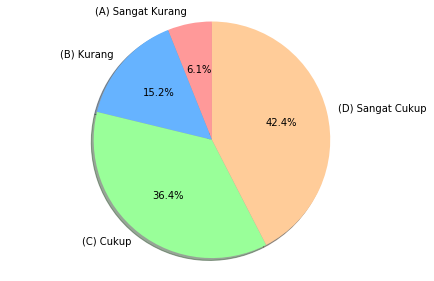

In [3]:
# Pie chart
labels = ['(A) Sangat Kurang', '(B) Kurang', '(C) Cukup', '(D) Sangat Cukup']
sizes = [
    result.loc[result["Tingkat Imunisasi"] == '(A) Sangat Kurang', 'Tingkat Imunisasi'].count(), 
    result.loc[result["Tingkat Imunisasi"] == '(B) Kurang', 'Tingkat Imunisasi'].count(), 
    result.loc[result["Tingkat Imunisasi"] == '(C) Cukup', 'Tingkat Imunisasi'].count(),
    result.loc[result["Tingkat Imunisasi"] == '(D) Sangat Cukup', 'Tingkat Imunisasi'].count()
]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
print('PRESEN CAKUPAN IMUNISASI DASAR PADA BAYI MENURUT PROVINSI TAHUN 2016')
plt.tight_layout()
plt.show()